In [10]:
from common_utils import switch_graph, cr

In [3]:
graphs.OrthogonalArrayBlockGraph(2,2).adjacency_matrix()

[0 1 1 0]
[1 0 0 1]
[1 0 0 1]
[0 1 1 0]

In [4]:
cr(graphs.CompleteGraph(5))

'5\n  0   1   1   1   1 \n  1   0   1   1   1 \n  1   1   0   1   1 \n  1   1   1   0   1 \n  1   1   1   1   0 \nrank 2'

In [5]:
def delete_vertex(graph):
    new_graph = graph.copy()
    # removing the first vertex
    new_graph.delete_vertex(new_graph.vertices()[0])
    return new_graph

In [112]:
OA = graphs.OrthogonalArrayBlockGraph(2, 7)
switched_OA = switch_graph([OA.vertices()[0]], OA)        
result = cr(switched_OA)
results = result.split("\n")

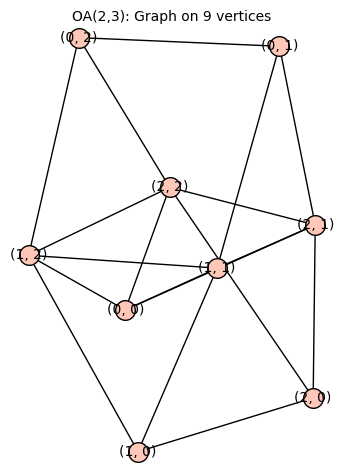

In [6]:
switch_graph([(0,0)], graphs.OrthogonalArrayBlockGraph(2, 3))

In [134]:
diags, matrix = results[1], results[3].split(" ")

In [135]:
c_configs = []

for i in range(int(results[0])):
    temp = []
    for j in range(int(results[0])):
        temp.append(int(matrix[i * int(results[0]) + j]))
    c_configs.append(temp)

c_configs

[[1, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13],
 [7, 0, 11, 11, 11, 10, 3, 3, 3, 15, 15, 15, 5, 5, 5],
 [7, 11, 0, 11, 11, 3, 10, 3, 3, 15, 5, 5, 15, 15, 5],
 [7, 11, 11, 0, 11, 3, 3, 10, 3, 5, 15, 5, 15, 5, 15],
 [7, 11, 11, 11, 0, 3, 3, 3, 10, 5, 5, 15, 5, 15, 15],
 [7, 10, 3, 3, 3, 0, 11, 11, 11, 15, 15, 15, 5, 5, 5],
 [7, 3, 10, 3, 3, 11, 0, 11, 11, 15, 5, 5, 15, 15, 5],
 [7, 3, 3, 10, 3, 11, 11, 0, 11, 5, 15, 5, 15, 5, 15],
 [7, 3, 3, 3, 10, 11, 11, 11, 0, 5, 5, 15, 5, 15, 15],
 [12, 14, 14, 4, 4, 14, 14, 4, 4, 2, 9, 9, 9, 9, 6],
 [12, 14, 4, 14, 4, 14, 4, 14, 4, 9, 2, 9, 9, 6, 9],
 [12, 14, 4, 4, 14, 14, 4, 4, 14, 9, 9, 2, 6, 9, 9],
 [12, 4, 14, 14, 4, 4, 14, 14, 4, 9, 9, 6, 2, 9, 9],
 [12, 4, 14, 4, 14, 4, 14, 4, 14, 9, 6, 9, 9, 2, 9],
 [12, 4, 4, 14, 14, 4, 4, 14, 14, 6, 9, 9, 9, 9, 2]]

In [136]:
diags = diags.split(" ")[:-1]
for i in range(len(diags)):
    diags[i] = int(diags[i])
l = diags
L = [ (l[i], i) for i in range(len(l)) ]

L.sort()
sorted_diag, perm = zip(*L)

In [133]:
g = graphs.CompleteGraph(6)
h = g.line_graph(labels=False)

switched_tri_graph = switch_graph([h.vertices()[0]], h)
result = cr(switched_tri_graph)
results = result.split("\n")

In [137]:
sorted_diag

(0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2)

In [138]:
perm

(1, 2, 3, 4, 5, 6, 7, 8, 0, 9, 10, 11, 12, 13, 14)

In [139]:
import numpy as np

def permutation_matrix(permutation):
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    
    # Place 1s according to the permutation list
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    
    return matrix

perm_matrix = permutation_matrix(perm)

In [140]:

c_matrix=np.array([np.array(xi) for xi in c_configs])


In [141]:
sorted_matrix = np.matmul(np.matmul(perm_matrix, c_matrix), np.transpose(perm_matrix))

In [142]:
for r in sorted_matrix:
    for j in r:
        print(f"{j:<3}", end=' ')
    print()

0   11  11  11  10  3   3   3   7   15  15  15  5   5   5   
11  0   11  11  3   10  3   3   7   15  5   5   15  15  5   
11  11  0   11  3   3   10  3   7   5   15  5   15  5   15  
11  11  11  0   3   3   3   10  7   5   5   15  5   15  15  
10  3   3   3   0   11  11  11  7   15  15  15  5   5   5   
3   10  3   3   11  0   11  11  7   15  5   5   15  15  5   
3   3   10  3   11  11  0   11  7   5   15  5   15  5   15  
3   3   3   10  11  11  11  0   7   5   5   15  5   15  15  
8   8   8   8   8   8   8   8   1   13  13  13  13  13  13  
14  14  4   4   14  14  4   4   12  2   9   9   9   9   6   
14  4   14  4   14  4   14  4   12  9   2   9   9   6   9   
14  4   4   14  14  4   4   14  12  9   9   2   6   9   9   
4   14  14  4   4   14  14  4   12  9   9   6   2   9   9   
4   14  4   14  4   14  4   14  12  9   6   9   9   2   9   
4   4   14  14  4   4   14  14  12  6   9   9   9   9   2   


In [144]:
graphs.OrthogonalArrayBlockGraph(3, 4).is_vertex_transitive()

True

In [55]:
s

In [56]:


# Extract, sort, and set diagonals
diagonals = extract_diagonals(c_configs)
sort_and_set_diagonals(c_configs, diagonals)

print("\nMatrix after sorting and reordering diagonals:")
print_matrix(c_configs)

IndexError: list index out of range

## Things to do
1. Create the type matrix function
   - just clean up until the permutation matrix part
   - apply it to adj matrix and config matrix
   - then from sorted config matrix, condense into the different blocks
2. Apply the whole thing to $OA(2, n)$ and $T(n)$ to observe
   - $OA(2, n)$ works because mostly CR = 15
   - $T(n)$ try to use $n$ = 6 and above since it converges to CR =  16
   - Try and see if the type matrices are all the same to show similarity

In [ ]:
OA = graphs.OrthogonalArrayBlockGraph(2, 7)
switched_OA = switch_graph([OA.vertices()[0]], OA)        
result = cr(switched_OA)
results = result.split("\n")
diags, matrix = results[1], results[3].split(" ")
config_matrix = []

for i in range(int(results[0])):
    temp = []
    for j in range(int(results[0])):
        temp.append(int(matrix[i * int(results[0]) + j]))
    config_matrix.append(temp)

config_matrix=np.array([np.array(xi) for xi in config_matrix])

diags = diags.split(" ")[:-1]
for i in range(len(diags)):
    diags[i] = int(diags[i])
l = diags
L = [ (l[i], i) for i in range(len(l)) ]

L.sort()
sorted_diag, perm = zip(*L)

import numpy as np

def permutation_matrix(permutation):
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    
    # Place 1s according to the permutation list
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    
    return matrix

perm_matrix = permutation_matrix(perm)

sorted_matrix = np.matmul(np.matmul(perm_matrix, config_matrix), np.transpose(perm_matrix))

for r in sorted_matrix:
    for j in r:
        print(f"{j:<3}", end=' ')
    print()

### Below code does the whole procedure to output the type matrix

In [180]:
import numpy as np

def permutation_matrix(permutation):
    """Create a permutation matrix from a given permutation list."""
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    return matrix

def get_intervals(lst):
    """Return intervals of consecutive identical elements in a sorted list."""
    intervals = []
    n = len(lst)
    start = 0
    
    for i in range(1, n + 1):
        if i == n or lst[i] != lst[start]:
            intervals.append((start, i - 1))
            start = i
            
    return intervals

def output_type_matrix(graph):
    switched_graph = switch_graph([graph.vertices()[0]], graph)
    results = cr(switched_graph).split("\n")
    
    dimension = int(results[0])
    diags = list(map(int, filter(None, results[1].split(" ")[:-1])))
    matrix_data = list(map(int, filter(None, results[3].split(" "))))
    
    config_matrix = np.array(matrix_data).reshape((dimension, dimension))
    
    sorted_diag, perm = zip(*sorted((value, index) for index, value in enumerate(diags)))
    
    perm_matrix = permutation_matrix(perm)
    sorted_matrix = perm_matrix @ config_matrix @ perm_matrix.T
    
    intervals = get_intervals(sorted_diag)
    res = []
    
    for i_start, i_end in intervals:
        tmp = []
        for j_start, j_end in intervals:
            
            # Use set comprehension to gather unique elements in the specified sub-matrix
            unique_elements = {sorted_matrix[row][col] for row in range(i_start, i_end + 1) for col in range(j_start, j_end + 1)}
            tmp.append(len(unique_elements))
        
        res.append(tmp)
    
    return res

def print_matrix(matrix):
    print(f"n = {n}")
    for row in res:
        print(row)
    print("\n")


In [181]:
print(f"For OA(2, n)")
print("-" * 40)
for n in range(3, 20):
    OA = graphs.OrthogonalArrayBlockGraph(2, n)
    type_matrix = output_type_matrix(OA)
    print_matrix(type_matrix)

For OA(2, n)
----------------------------------------
n = 3
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 4
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 5
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 6
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 7
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 8
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 9
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 10
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 11
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 12
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 13
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 14
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 15
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 16
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 17
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 18
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 19
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]




In [182]:
print(f"For T(n)")
print("-" * 40)
for n in range(3, 20):
    OA = graphs.CompleteGraph(n).line_graph()
    type_matrix = output_type_matrix(OA)
    print_matrix(type_matrix)

For T(n)
----------------------------------------
n = 3
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 4
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 5
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 6
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 7
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 8
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 9
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 10
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 11
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 12
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 13
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 14
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 15
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 16
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 17
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 18
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 19
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]




### Now to apply the same to the adjacency matrix and to observe the subgraphs

In [184]:
# maybe can just use the vertices in the block, and drop the rest

"""
1) Permutate the original adj amtrix
2) use the intervals generated to get the vertices to drop
3) generate the subgraphs to observe properties?
"""

'\n1) Permutate the original adj amtrix\n2) use the intervals generated to get the vertices to drop\n3) generate the subgraphs to observe properties?\n'